In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r'C:\Users\User\Downloads\USArrests.csv')

In [3]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
data.isna().sum()


Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [6]:
data.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['UrbanPop']=le.fit_transform(data['UrbanPop'])

In [8]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,12,21.2
1,Alaska,10.0,263,4,44.5
2,Arizona,8.1,294,28,31.0
3,Arkansas,8.8,190,5,19.5
4,California,9.0,276,35,40.6


In [10]:
data.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [15]:
x=data[['Murder', 'Assault', 'UrbanPop', 'Rape']]

In [16]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1, 11):
    km=KMeans(n_clusters=i,n_init=10)
    km.fit(x)
    css=km.inertia_
    wcss.append(css)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows wi

In [17]:
 wcss       

[350592.6216000001,
 91279.85573070607,
 43358.85821428571,
 30518.87221428572,
 20207.76638095238,
 14655.767333333333,
 11410.195999999998,
 9238.617833333332,
 7964.729047619048,
 7379.749047619048]

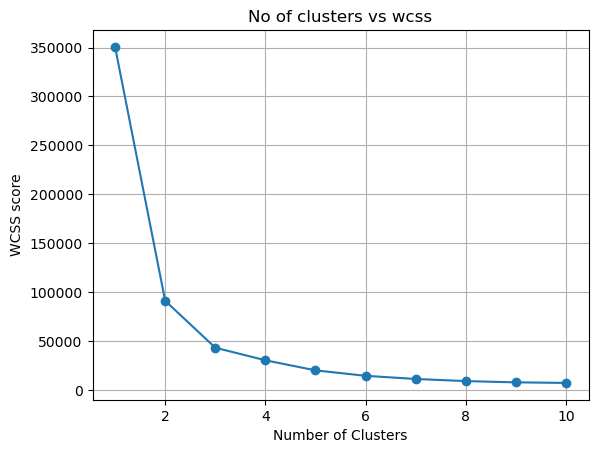

In [18]:
plt.plot(range(1,11),wcss,'o-')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS score')
plt.title('No of clusters vs wcss')
plt.grid()
plt.show()

In [33]:
    km=KMeans(n_clusters=3,n_init=10)


In [34]:
km.fit(x)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init=10)

In [35]:
cluster_labels =km.predict(x)

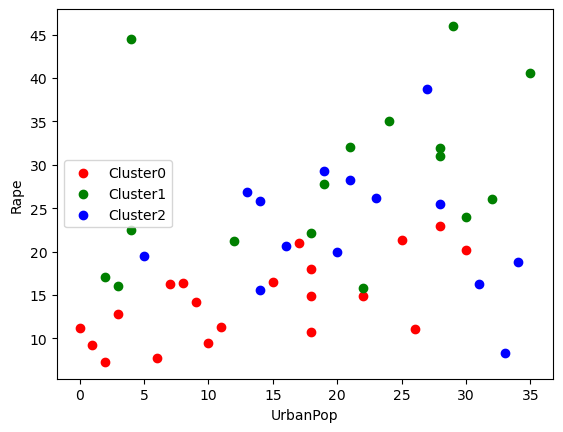

In [36]:
colors=['r','g','b']
for i in range(max(cluster_labels)+1):
    cluster_data=x[cluster_labels==i]
    plt.scatter(cluster_data['UrbanPop'],
                cluster_data['Rape'],
                c=colors[i],
                label=f'Cluster{i}')
    plt.xlabel('UrbanPop')
    plt.ylabel('Rape')
    plt.legend()

In [37]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

In [38]:
mergings=linkage(x,method="ward")

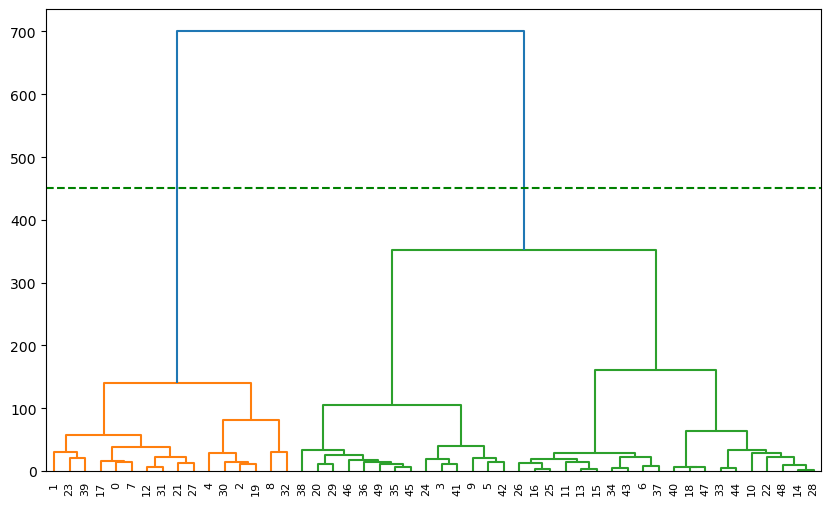

In [40]:
plt.figure(figsize=(10,6))
dendrogram(mergings)
plt.axhline(450,color='green',linestyle='--')
plt.show()

In [41]:
cluster_labels=fcluster(mergings,450,criterion="distance")

In [42]:
cluster_labels

array([1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2], dtype=int32)

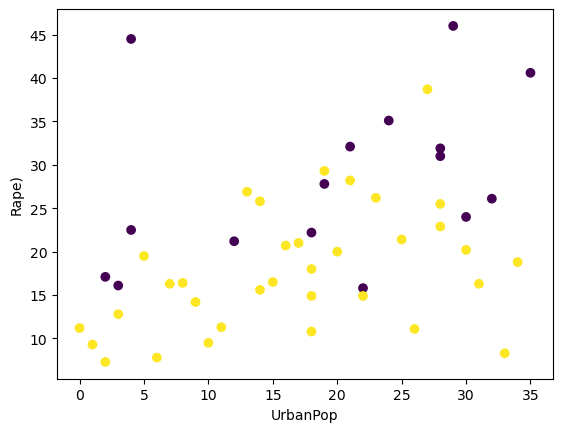

In [43]:
    plt.scatter(x['UrbanPop'],
                x['Rape'],
                c=cluster_labels)
  
              
    plt.xlabel('UrbanPop')
    plt.ylabel('Rape)')
    plt.title('')
    plt.show()
    